In [9]:
# Importing libraries and APIs
import numpy as np
import pandas as pd 
import yfinance as yf
from datetime import datetime, timedelta

In [2]:
# FINDING TICKERS FOR EVERY STOCK THAT WILL BE USED
tickers = ['AAPL', 'MSFT', 'JNJ', 
           'TSLA', 'NVDA', 'PG', 
           'KO', 'BABA', 'TCEHY', 
           'SPY', 'VTI']

In [3]:
# SETTING END DATE
end_date = datetime.today()
print(end_date)

2024-10-09 16:58:25.735411


In [4]:
# SETTING START DATE 5 YEARS FROM NOW
start_date = end_date - timedelta(days = 5*365)
print(start_date)

2019-10-11 16:58:25.735411


In [5]:
# CREATING A DATAFRAME FOR ADJUSTED CLOSE PRICES
adj_close_df = pd.DataFrame()

In [6]:
# DOWNLOADING PRICES FOR EACH TICKER
for ticker in tickers:
    data = yf.download(ticker, start = start_date, end = end_date)
    adj_close_df[ticker] = data['Adj Close']

[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed


In [7]:
print(adj_close_df)

                  AAPL        MSFT         JNJ        TSLA        NVDA  \
Date                                                                     
2019-10-11   57.141800  133.415344  114.444702   16.525999    4.627243   
2019-10-14   57.059544  133.291168  113.913162   17.130667    4.640678   
2019-10-15   56.926495  135.220566  115.760574   17.192667    4.885486   
2019-10-16   56.696682  134.112610  117.791008   17.316668    4.831749   
2019-10-17   56.916817  133.424881  118.662445   17.464666    4.833739   
...                ...         ...         ...         ...         ...   
2024-10-03  225.669998  416.540009  160.500000  240.660004  122.849998   
2024-10-04  226.800003  416.059998  160.289993  250.080002  124.919998   
2024-10-07  221.690002  409.540009  159.529999  240.830002  127.720001   
2024-10-08  225.770004  414.709991  159.690002  244.500000  132.889999   
2024-10-09  229.539993  417.459991  160.649994  241.050003  132.649994   

                    PG         KO    

# Calculate Lognormal Returns

## calculating log returns for each ticker

In [10]:
log_returns = np.log(adj_close_df / adj_close_df.shift(1))

## Dropping missing values

In [11]:
log_returns = log_returns.dropna()

# Calculating covariance matrix

In [14]:
cov_matrix = log_returns.cov()*252
print(cov_matrix)

           AAPL      MSFT       JNJ      TSLA      NVDA        PG        KO  \
AAPL   0.100437  0.072156  0.023353  0.104511  0.104387  0.028043  0.029049   
MSFT   0.072156  0.091888  0.023110  0.092238  0.111792  0.028703  0.027730   
JNJ    0.023353  0.023110  0.039276  0.011716  0.016884  0.025119  0.023843   
TSLA   0.104511  0.092238  0.011716  0.433064  0.171062  0.015012  0.024444   
NVDA   0.104387  0.111792  0.016884  0.171062  0.284189  0.026423  0.024607   
PG     0.028043  0.028703  0.025119  0.015012  0.026423  0.043849  0.028653   
KO     0.029049  0.027730  0.023843  0.024444  0.024607  0.028653  0.043375   
BABA   0.049981  0.044769  0.011345  0.099355  0.084105  0.013091  0.013427   
TCEHY  0.046222  0.044324  0.009104  0.088439  0.079005  0.011503  0.012012   
SPY    0.052811  0.052264  0.021625  0.070551  0.078627  0.024299  0.028020   
VTI    0.053379  0.052801  0.021389  0.074761  0.080534  0.023866  0.028054   

           BABA     TCEHY       SPY       VTI  
AAP

# Defining Portfolio Perfomance Metrics

## Calculating portfolio std

In [15]:
def standard_deviation(weights, cov_matrix):
    variance = weights.T @ cov_matrix @ weights
    return np.sqrt(variance)

## Calculating expected return

In [16]:
def excepted_return(weights, log_returns):
    return np.sum(log_returns.mean()*weights)*252

## Calculating Sharpe Ratio

In [17]:
def sharpe_ratio(weights, log_returns, cov_matrix, risk_free_rate):
    return(excepted_return(weights, log_returns) - risk_free_rate) / standard_deviation(weights, cov_matrix)

# Portfolio Optimization

## Setting Risk Free Rate

In [19]:
# Importing FRED API
from fredapi import Fred 

fred = Fred(api_key = '9ced124c5a728e16342d9fcf66ab176d')
ten_year_treasury_rate = fred.get_series_latest_release('GS10') / 100

# Setting risk free rate
risk_free_rate = ten_year_treasury_rate.iloc[-1]
print(risk_free_rate)



0.037200000000000004


## Using negative sharpe ratio

In [20]:
def neg_sharpe_ratio(weights, log_returns, cov_matrix, risk_free_rate):
    return -sharpe_ratio(weights, log_returns, cov_matrix, risk_free_rate)

## Setting contraints and bounds

In [25]:
constraints = {'type': 'eq', 'fun': lambda weights: np.sum(weights) - 1}
bounds = [(0, 0.5) for _ in range(len(tickers))]

## Set intial weights

In [22]:
intial_weights = np.array([1/len(tickers)]*len(tickers))
print(intial_weights)

[0.09090909 0.09090909 0.09090909 0.09090909 0.09090909 0.09090909
 0.09090909 0.09090909 0.09090909 0.09090909 0.09090909]


## Optimizing weights to maximuze Sharpe Ratio

In [23]:
from scipy.optimize import minimize

In [27]:
optimized_results = minimize(neg_sharpe_ratio, intial_weights, args = (log_returns, cov_matrix, risk_free_rate), method='SLSQP', constraints=constraints, bounds=bounds)

## Get the optimal weights

In [28]:
optimal_weights = optimized_results.x

# Vizualing

## Displaying analytics

In [29]:
print("Optimal Weights:")
for ticker, weight in zip(tickers, optimal_weights):
    print(f"{ticker}: {weight:4f}")

print()

optimal_portfolio_return = excepted_return(optimal_weights, log_returns)
optimal_portfolio_volatility = standard_deviation(optimal_weights, cov_matrix)
optimal_sharpe_ratio = sharpe_ratio(optimal_weights, log_returns, cov_matrix, risk_free_rate)

print(f"Expected Annual Return: {optimal_portfolio_return:4f}")
print(f"Expected Volatility: {optimal_portfolio_volatility:4f}")
print(f"Sharpe Ratio: {optimal_sharpe_ratio:4f}")

Optimal Weights:
AAPL: 0.105274
MSFT: 0.000000
JNJ: 0.092402
TSLA: 0.147587
NVDA: 0.500000
PG: 0.154737
KO: 0.000000
BABA: 0.000000
TCEHY: 0.000000
SPY: 0.000000
VTI: 0.000000

Expected Annual Return: 0.465910
Expected Volatility: 0.362219
Sharpe Ratio: 1.183566


## Plotting

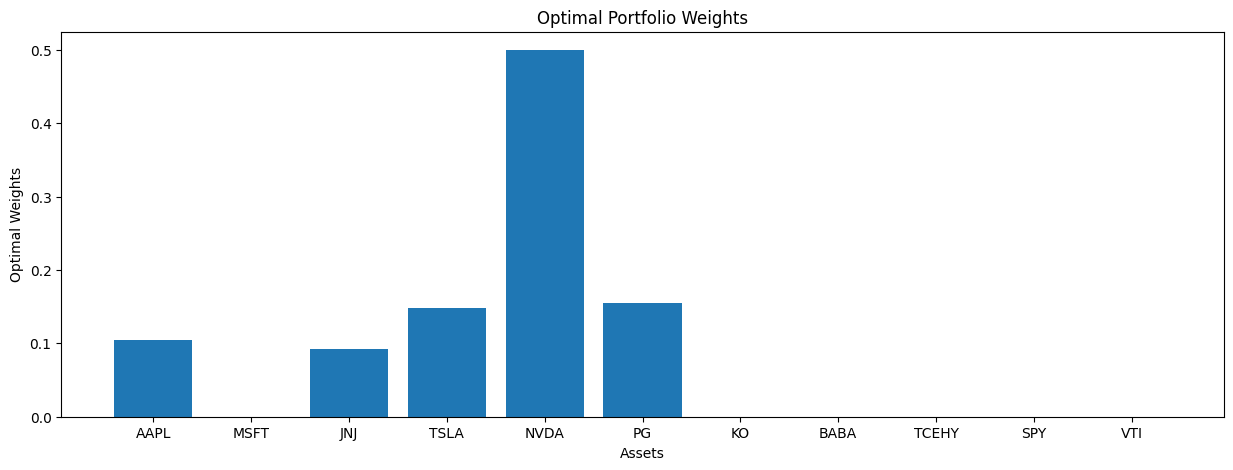

In [30]:
import matplotlib.pyplot as plt 

plt.figure(figsize=(15,5))
plt.bar(tickers, optimal_weights)

plt.xlabel('Assets')
plt.ylabel('Optimal Weights')
plt.title('Optimal Portfolio Weights')

plt.show()